In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from tensorflow import keras

In [3]:
model_path = "/content/drive/MyDrive/Final/gray/model_gray.h5"
loaded_model = keras.models.load_model(model_path)

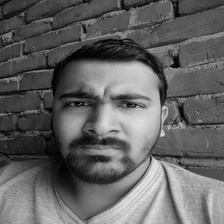

0

In [4]:
image = cv2.imread("/content/drive/MyDrive/Final/gray/valid/angry/10.jpg")
cv2_imshow(image)
image_fromarray = Image.fromarray(image, 'RGB')
resize_image = image_fromarray.resize((64, 64))
expand_input = np.expand_dims(resize_image,axis=0)
input_data = np.array(expand_input)
input_data = input_data/255
pred = loaded_model.predict(input_data)
result = pred.argmax()
result

In [5]:
classNo = result
def getCalssName(classNo):
  if   classNo == 0: return 'angry'
  elif classNo == 1: return 'happy'
  elif classNo == 2: return 'neutral'
  elif classNo == 3: return 'sad'
  elif classNo == 4: return 'surprise'
mood=getCalssName(classNo)
print("the detected mood is {}".format(mood))

the detected mood is angry


In [6]:
import pandas as pd
movies = pd.read_csv("/content/drive/MyDrive/Final/Movie_Data/movie_data.csv")
movies

,Unnamed: 0,title,year,vote_count,vote_average,popularity,genres,wr
0,0,Toy Story,1995,5415,7,21.946943,Animation,6.869770
1,1,Jumanji,1995,2413,6,17.015539,adventure,5.884891
2,5,Heat,1995,1886,7,17.924927,action,6.671675
3,9,GoldenEye,1995,1194,6,14.686036,adventure,5.798701
4,15,Casino,1995,1343,7,10.137389,drama,6.571348
...,...,...,...,...,...,...,...,...
2269,44624,What Happened to Monday,2017,598,7,60.581223,Science Fiction,6.261904
2270,44632,Atomic Blonde,2017,748,6,14.455104,action,5.722745
2271,44678,Dunkirk,2017,2712,7,30.938854,action,6.757878
2272,44842,Transformers: The Last Knight,2017,1440,6,39.186819,action,5.825125


In [7]:
pd.DataFrame(movies).shape

(2274, 8)

In [8]:
movies[['genres']].drop_duplicates()

,genres
0,Animation
1,adventure
2,action
4,drama
5,crime
7,Science Fiction
8,Fantasy
9,comedy
14,comedy
15,horror


In [9]:
title = movies["title"].values
genre = movies["genres"].values

In [10]:
classNo = result
def getCalssName(classNo):
  if   classNo == 0: return 'action'
  elif classNo == 1: return 'comedy'
  elif classNo == 2: return 'adventure'
  elif classNo == 3: return 'crime'
  elif classNo == 4: return 'thriller'
mood=getCalssName(classNo)
print(mood)

action


In [11]:
movie = movies[(movies['wr'] >= 5.244896612406511) & (movies['genres'] == mood)].sample(replace=False, n=3)

In [12]:
movie_title = movie['title'].to_string(index=False)

In [13]:
print("Three recommanded movies are: ")
print(format(movie_title))

Three recommanded movies are: 
Maze Runner: The Scorch Trials
                 State of Play
    Once Upon a Time in Mexico


In [14]:
movie

,Unnamed: 0,title,year,vote_count,vote_average,popularity,genres,wr
1933,25206,Maze Runner: The Scorch Trials,2015,3148,6,41.225769,action,5.908511
1231,13606,State of Play,2009,489,6,8.905732,action,5.644946
741,6560,Once Upon a Time in Mexico,2003,605,6,8.843365,action,5.684586
